In [1]:
from langgraph.graph import StateGraph, START, MessagesState
from langchain_perplexity import ChatPerplexity
from dotenv import load_dotenv

In [2]:
load_dotenv()

True

In [3]:
model = ChatPerplexity()

In [4]:
def call_model(state: MessagesState):
    response = model.invoke(state["messages"])
    return {"messages": [response]}

In [6]:
builder = StateGraph(MessagesState)
builder.add_node("call_model", call_model)
builder.add_edge(START, "call_model")

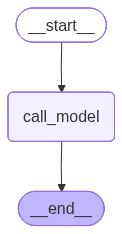

In [7]:
graph = builder.compile()
graph

In [8]:
graph.invoke({"messages": [{"role": "user", "content": "Hi! My name is Waseem Akram."}]})

{'messages': [HumanMessage(content='Hi! My name is Waseem Akram.', additional_kwargs={}, response_metadata={}, id='fbfe6593-210a-4fa7-b8c5-86142f31ba29'),
  AIMessage(content='Hello! It\'s nice to meet you. However, I should clarify that you may share a name with **Wasim Akram**, the legendary Pakistani cricketer. \n\nWasim Akram (born June 3, 1966, in Lahore, Pakistan) is widely regarded as one of the greatest fast bowlers of all time[3]. He was a pioneering figure in reverse swing bowling and helped lead Pakistan to victory in the 1992 Cricket World Cup[3]. During his career, he accumulated 414 wickets in Test cricket and 502 wickets in One Day Internationals, earning him the nickname "Sultan of Swing"[2][4]. After retiring in 2003, he became a cricket commentator and coach, and was inducted into the International Cricket Council\'s Hall of Fame in 2009[3].\n\nIs there something specific you\'d like to know about the cricketer, or were you just introducing yourself?', additional_kwar

In [9]:
graph.invoke({"messages": [{"role": "user", "content": "What is my name?"}]})

{'messages': [HumanMessage(content='What is my name?', additional_kwargs={}, response_metadata={}, id='3e1164d6-34eb-49a0-90d2-1bc488214bf2'),
  AIMessage(content='I do not know your name, as you have not provided it in this conversation, and the search results do not contain any personal information about you.[1][2][3][4][5][6] These results describe general people search tools and methods (e.g., entering a name, location, or other details into sites like PeopleFinder or Google to find public records), but none identify a specific individual without input.[1][2][4] If you share your name or additional details, I can assist with related searches using those tools.[3][6]', additional_kwargs={'citations': ['https://www.peoplefinder.com', 'https://searqle.io', 'https://support.google.com/websearch/answer/12719076?hl=en', 'https://agilityportal.io/blog/find-a-person-by-name-for-free-best-people-search-engines', 'https://www.anywho.com', 'https://www.youtube.com/watch?v=afxWX8xJiik'], 'sear

In [10]:
def call_model(state: MessagesState):
    response = model.invoke(state["messages"])
    return {"messages": [response]}

In [11]:
builder = StateGraph(MessagesState)
builder.add_node("call_model", call_model)
builder.add_edge(START, "call_model")

In [12]:
from langgraph.checkpoint.memory import InMemorySaver

checkpointer = InMemorySaver()
graph = builder.compile(checkpointer=checkpointer)

In [13]:
config = {"configurable": {"thread_id": "thread-1"}}
config2 = {"configurable": {"thread_id": "thread-2"}}

In [14]:
graph.invoke({"messages": [{"role": "user", "content": "Hi! My name is Waseem Akram."}]}, config)

{'messages': [HumanMessage(content='Hi! My name is Waseem Akram.', additional_kwargs={}, response_metadata={}, id='465aabcb-098d-446b-954b-48fbe89c652b'),
  AIMessage(content='**Wasim Akram** (born June 3, 1966, in Lahore, Pakistan) is a former Pakistani cricketer widely regarded as one of the greatest left-arm fast bowlers in history, known as the "Sultan of Swing" or "King of Swings" for his mastery of swing and reverse swing bowling.[1][3][4]\n\nHe holds Pakistan\'s records for most wickets in Test cricket (414 in 104 matches) and ODIs (502), along with world records for most ODI wickets and List A wickets (881) at the time of his retirement in 2003.[1][2][3][4] Akram debuted internationally in 1984-85 as a teenager, spotted by Javed Miandad after excelling in club cricket, and rose rapidly, pairing with mentor Imran Khan.[1][2][3] Key achievements include leading Pakistan to the 1992 World Cup victory (man of the match in the final), reaching the 1999 final, winning the 1996-97 Wor

In [15]:
graph.invoke({"messages": [{"role": "user", "content": "What is my name?"}]}, config)

{'messages': [HumanMessage(content='Hi! My name is Waseem Akram.', additional_kwargs={}, response_metadata={}, id='465aabcb-098d-446b-954b-48fbe89c652b'),
  AIMessage(content='**Wasim Akram** (born June 3, 1966, in Lahore, Pakistan) is a former Pakistani cricketer widely regarded as one of the greatest left-arm fast bowlers in history, known as the "Sultan of Swing" or "King of Swings" for his mastery of swing and reverse swing bowling.[1][3][4]\n\nHe holds Pakistan\'s records for most wickets in Test cricket (414 in 104 matches) and ODIs (502), along with world records for most ODI wickets and List A wickets (881) at the time of his retirement in 2003.[1][2][3][4] Akram debuted internationally in 1984-85 as a teenager, spotted by Javed Miandad after excelling in club cricket, and rose rapidly, pairing with mentor Imran Khan.[1][2][3] Key achievements include leading Pakistan to the 1992 World Cup victory (man of the match in the final), reaching the 1999 final, winning the 1996-97 Wor

In [16]:
graph.invoke({"messages": [{"role": "user", "content": "What is my name?"}]}, config2)

{'messages': [HumanMessage(content='What is my name?', additional_kwargs={}, response_metadata={}, id='c022af37-1b81-4fa9-b5d8-5a87afcba69a'),
  AIMessage(content="I do not know your name, as you have not provided it in this conversation, and no identifying information is available to me.[3]\n\nPeople search tools like PeopleFinder, Searqle, AnyWho, and Whitepages can help locate names and details using public records, but they require input such as a name, phone number, address, or email to function—and I cannot access or perform real-time searches on your behalf.[1][2][5] If you'd like guidance on using these tools yourself (e.g., entering a name with location for better results), provide more details.[4]", additional_kwargs={'citations': ['https://www.peoplefinder.com', 'https://searqle.io', 'https://support.google.com/websearch/answer/12719076?hl=en', 'https://agilityportal.io/blog/find-a-person-by-name-for-free-best-people-search-engines', 'https://www.anywho.com', 'https://www.yo

In [17]:
snap = graph.get_state(config)
vals = snap.values
for m in vals.get("messages", []):
        print("-", type(m).__name__, ":", m.content)

- HumanMessage : Hi! My name is Waseem Akram.
- AIMessage : **Wasim Akram** (born June 3, 1966, in Lahore, Pakistan) is a former Pakistani cricketer widely regarded as one of the greatest left-arm fast bowlers in history, known as the "Sultan of Swing" or "King of Swings" for his mastery of swing and reverse swing bowling.[1][3][4]

He holds Pakistan's records for most wickets in Test cricket (414 in 104 matches) and ODIs (502), along with world records for most ODI wickets and List A wickets (881) at the time of his retirement in 2003.[1][2][3][4] Akram debuted internationally in 1984-85 as a teenager, spotted by Javed Miandad after excelling in club cricket, and rose rapidly, pairing with mentor Imran Khan.[1][2][3] Key achievements include leading Pakistan to the 1992 World Cup victory (man of the match in the final), reaching the 1999 final, winning the 1996-97 World Series in Australia, and taking four international hat-tricks.[2][3][4]

Injuries, like a groin issue in the late 19